In [1]:
import pandas as pd
import numpy as np

In [3]:
# uploading data file
from google.colab import files
uploader = files.upload()

Saving uber_data.csv to uber_data.csv


In [8]:
# reading csv data file
data = pd.read_csv(r"/content/uber_data.csv")  # or just "content/uber_data.csv"
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [9]:
data['trip_id'] = data.index

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   pickup_longitude       100000 non-null  float64
 6   pickup_latitude        100000 non-null  float64
 7   RatecodeID             100000 non-null  int64  
 8   store_and_fwd_flag     100000 non-null  object 
 9   dropoff_longitude      100000 non-null  float64
 10  dropoff_latitude       100000 non-null  float64
 11  payment_type           100000 non-null  int64  
 12  fare_amount            100000 non-null  float64
 13  extra                  100000 non-null  float64
 14  mta_tax                100000 non-nul

In [11]:
# type conversions
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [12]:
data['tpep_dropoff_datetime']

,tpep_dropoff_datetime
0,2016-03-01 00:07:55
1,2016-03-01 00:11:06
2,2016-03-01 00:31:06
3,2016-03-01 00:00:00
4,2016-03-01 00:00:00
...,...
99995,2016-03-01 06:22:15
99996,2016-03-01 06:32:41
99997,2016-03-01 06:37:23
99998,2016-03-01 06:22:09


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100000 non-null  int64         
 1   tpep_pickup_datetime   100000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  100000 non-null  datetime64[ns]
 3   passenger_count        100000 non-null  int64         
 4   trip_distance          100000 non-null  float64       
 5   pickup_longitude       100000 non-null  float64       
 6   pickup_latitude        100000 non-null  float64       
 7   RatecodeID             100000 non-null  int64         
 8   store_and_fwd_flag     100000 non-null  object        
 9   dropoff_longitude      100000 non-null  float64       
 10  dropoff_latitude       100000 non-null  float64       
 11  payment_type           100000 non-null  int64         
 12  fare_amount            100000 non-null  float

In [14]:
# checking duplicates
ans = int(data.duplicated().sum())
ans

0

# Data Transformation and Modeling Done Together

In [15]:
# datetime_dim
datetime_dim = data[['tpep_pickup_datetime', 'tpep_dropoff_datetime']]

In [16]:
datetime_dim['pickup_hour'] = datetime_dim['tpep_pickup_datetime'].dt.hour
datetime_dim['pickup_day'] = datetime_dim['tpep_pickup_datetime'].dt.day
datetime_dim['pickup_weekday'] = datetime_dim['tpep_pickup_datetime'].dt.weekday
datetime_dim['pickup_month'] = datetime_dim['tpep_pickup_datetime'].dt.month
datetime_dim['pickup_year'] = datetime_dim['tpep_pickup_datetime'].dt.year

/tmp/ipython-input-1816695665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datetime_dim['pickup_hour'] = datetime_dim['tpep_pickup_datetime'].dt.hour
/tmp/ipython-input-1816695665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datetime_dim['pickup_day'] = datetime_dim['tpep_pickup_datetime'].dt.day
/tmp/ipython-input-1816695665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [17]:
datetime_dim['drop_hour'] = datetime_dim['tpep_dropoff_datetime'].dt.hour
datetime_dim['drop_day'] = datetime_dim['tpep_dropoff_datetime'].dt.day
datetime_dim['drop_weekday'] = datetime_dim['tpep_dropoff_datetime'].dt.weekday
datetime_dim['drop_month'] = datetime_dim['tpep_dropoff_datetime'].dt.month
datetime_dim['drop_year'] = datetime_dim['tpep_dropoff_datetime'].dt.year

/tmp/ipython-input-2369486348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datetime_dim['drop_hour'] = datetime_dim['tpep_dropoff_datetime'].dt.hour
/tmp/ipython-input-2369486348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datetime_dim['drop_day'] = datetime_dim['tpep_dropoff_datetime'].dt.day
/tmp/ipython-input-2369486348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [18]:
datetime_dim['datetime_id'] = datetime_dim.index

/tmp/ipython-input-1085316748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datetime_dim['datetime_id'] = datetime_dim.index


In [19]:
datetime_dim.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'pickup_hour',
       'pickup_day', 'pickup_weekday', 'pickup_month', 'pickup_year',
       'drop_hour', 'drop_day', 'drop_weekday', 'drop_month', 'drop_year',
       'datetime_id'],
      dtype='object')

In [20]:
pickup_location_dim = data[['pickup_latitude', 'pickup_longitude']]
pickup_location_dim['pickup_location_id'] = pickup_location_dim.index
pickup_location_dim = pickup_location_dim[['pickup_location_id','pickup_latitude','pickup_longitude']]
pickup_location_dim

/tmp/ipython-input-3590796290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pickup_location_dim['pickup_location_id'] = pickup_location_dim.index


,pickup_location_id,pickup_latitude,pickup_longitude
0,0,40.765152,-73.976746
1,1,40.767925,-73.983482
2,2,40.644810,-73.782021
3,3,40.769814,-73.863419
4,4,40.792183,-73.971741
...,...,...,...
99995,99995,40.750519,-73.990898
99996,99996,40.718296,-74.014488
99997,99997,40.774097,-73.963379
99998,99998,40.763111,-73.984901


In [21]:
dropoff_location_dim = data[['dropoff_longitude', 'dropoff_latitude']]
dropoff_location_dim['dropoff_location_id'] = dropoff_location_dim.index
dropoff_location_dim = dropoff_location_dim[['dropoff_location_id', 'dropoff_latitude', 'dropoff_longitude']]
dropoff_location_dim

/tmp/ipython-input-340585180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropoff_location_dim['dropoff_location_id'] = dropoff_location_dim.index


,dropoff_location_id,dropoff_latitude,dropoff_longitude
0,0,40.746128,-74.004265
1,1,40.733166,-74.005943
2,2,40.675770,-73.974541
3,3,40.757767,-73.969650
4,4,40.695053,-74.177170
...,...,...,...
99995,99995,40.750462,-73.998245
99996,99996,40.752529,-73.982361
99997,99997,40.770512,-73.865028
99998,99998,40.759148,-73.970695


In [22]:
payment_type_name = {
    1:"Credit card",
    2:"Cash",
    3:"No charge",
    4:"Dispute",
    5:"Unknown",
    6:"Voided trip"
}

payment_type_dim = data[['payment_type']]
payment_type_dim['payment_type_id'] = payment_type_dim.index
payment_type_dim['payment_type_name'] = payment_type_dim['payment_type'].map(payment_type_name)
payment_type_dim

/tmp/ipython-input-3171444021.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payment_type_dim['payment_type_id'] = payment_type_dim.index
/tmp/ipython-input-3171444021.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payment_type_dim['payment_type_name'] = payment_type_dim['payment_type'].map(payment_type_name)


,payment_type,payment_type_id,payment_type_name
0,1,0,Credit card
1,1,1,Credit card
2,1,2,Credit card
3,1,3,Credit card
4,1,4,Credit card
...,...,...,...
99995,2,99995,Cash
99996,1,99996,Credit card
99997,1,99997,Credit card
99998,1,99998,Credit card


In [23]:
rate_code_type = {
    1:"Standard rate",
    2:"JFK",
    3:"Newark",
    4:"Nassau or Westchester",
    5:"Negotiated fare",
    6:"Group ride"
}

rate_code_dim = data[['RatecodeID']]
rate_code_dim['rate_code_id'] = rate_code_dim.index
rate_code_dim['rate_code_type'] = rate_code_dim['RatecodeID'].map(rate_code_type)
rate_code_dim = rate_code_dim[['rate_code_id', 'RatecodeID', 'rate_code_type']]
rate_code_dim

/tmp/ipython-input-2466067013.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_code_dim['rate_code_id'] = rate_code_dim.index
/tmp/ipython-input-2466067013.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_code_dim['rate_code_type'] = rate_code_dim['RatecodeID'].map(rate_code_type)


,rate_code_id,RatecodeID,rate_code_type
0,0,1,Standard rate
1,1,1,Standard rate
2,2,1,Standard rate
3,3,1,Standard rate
4,4,3,Newark
...,...,...,...
99995,99995,1,Standard rate
99996,99996,1,Standard rate
99997,99997,1,Standard rate
99998,99998,1,Standard rate


In [24]:
passenger_count_dim = data[['passenger_count']]
passenger_count_dim['passenger_count_id'] = passenger_count_dim.index
passenger_count_dim = passenger_count_dim[['passenger_count_id','passenger_count']]

trip_distance_dim = data[['trip_distance']].reset_index(drop=True)
trip_distance_dim['trip_distance_id'] = trip_distance_dim.index
trip_distance_dim = trip_distance_dim[['trip_distance_id','trip_distance']]

/tmp/ipython-input-764414733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passenger_count_dim['passenger_count_id'] = passenger_count_dim.index


In [25]:
# merging columns by using trip_id everytime with other mentioned indexed id of extrcated data

fact_table = data.merge(passenger_count_dim, left_on='trip_id', right_on='passenger_count_id') \
             .merge(trip_distance_dim, left_on='trip_id', right_on='trip_distance_id') \
             .merge(rate_code_dim, left_on='trip_id', right_on='rate_code_id') \
             .merge(pickup_location_dim, left_on='trip_id', right_on='pickup_location_id') \
             .merge(dropoff_location_dim, left_on='trip_id', right_on='dropoff_location_id')\
             .merge(datetime_dim, left_on='trip_id', right_on='datetime_id') \
             .merge(payment_type_dim, left_on='trip_id', right_on='payment_type_id') \
             [['trip_id','VendorID', 'datetime_id', 'passenger_count_id',
               'trip_distance_id', 'rate_code_id', 'store_and_fwd_flag', 'pickup_location_id', 'dropoff_location_id',
               'payment_type_id', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
               'improvement_surcharge', 'total_amount']]

In [26]:
fact_table

,trip_id,VendorID,datetime_id,passenger_count_id,trip_distance_id,rate_code_id,store_and_fwd_flag,pickup_location_id,dropoff_location_id,payment_type_id,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0,1,0,0,0,0,N,0,0,0,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,1,1,1,1,1,N,1,1,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2,2,2,2,2,N,2,2,2,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,3,2,3,3,3,3,N,3,3,3,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,4,2,4,4,4,4,N,4,4,4,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,99995,99995,99995,99995,N,99995,99995,99995,5.0,0.0,0.5,0.00,0.00,0.3,5.80
99996,99996,1,99996,99996,99996,99996,N,99996,99996,99996,14.0,0.0,0.5,2.00,0.00,0.3,16.80
99997,99997,1,99997,99997,99997,99997,N,99997,99997,99997,29.0,0.0,0.5,8.80,5.54,0.3,44.14
99998,99998,2,99998,99998,99998,99998,N,99998,99998,99998,5.5,0.5,0.5,1.36,0.00,0.3,8.16


In [27]:
# List all variables in memory
%who DataFrame


data	 datetime_dim	 dropoff_location_dim	 fact_table	 passenger_count_dim	 payment_type_dim	 pickup_location_dim	 rate_code_dim	 trip_distance_dim	 



# Data Loading

In [28]:
# pip install duckdb


In [29]:
import duckdb

In [30]:
con = duckdb.connect("uber_etl.duckdb")  # or use ":memory:" for in-memory

In [31]:
con.register("fact_df", fact_table)  # register DataFrame as a DuckDB table
con.execute("CREATE TABLE fact_table AS SELECT * FROM fact_df")

In [32]:
# checking the result
result = con.execute("SELECT * FROM fact_table LIMIT 5").fetchdf()
result


,trip_id,VendorID,datetime_id,passenger_count_id,trip_distance_id,rate_code_id,store_and_fwd_flag,pickup_location_id,dropoff_location_id,payment_type_id,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0,1,0,0,0,0,N,0,0,0,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,1,1,1,1,1,N,1,1,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2,2,2,2,2,N,2,2,2,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,3,2,3,3,3,3,N,3,3,3,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,4,2,4,4,4,4,N,4,4,4,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [34]:
# our dataFrames
dfs = {
    "passenger_count": passenger_count_dim,
    "trip_distance": trip_distance_dim,
    "rate_code": rate_code_dim,
    "pickup_location": pickup_location_dim,
    "dropoff_location": dropoff_location_dim,
    "datetime": datetime_dim,
    "payment_type": payment_type_dim
}

# Register and create tables in DuckDB
for table_name, df in dfs.items():
    con.register(f"{table_name}_df", df)  # Temporary name in DuckDB
    con.execute(f"CREATE TABLE {table_name} AS SELECT * FROM {table_name}_df")


# Data Analysis using SQL Queries

In [35]:
result = con.execute('Select * from payment_type_df limit 4').fetch_df()
result

,payment_type,payment_type_id,payment_type_name
0,1,0,Credit card
1,1,1,Credit card
2,1,2,Credit card
3,1,3,Credit card


In [42]:
# trips by passengers count
con.execute("""
    SELECT pc.passenger_count, COUNT(*) AS trip_count
    FROM fact_table ft
    JOIN passenger_count pc ON ft.passenger_count_id = pc.passenger_count_id
    GROUP BY pc.passenger_count
    ORDER BY trip_count DESC
""").fetchdf()


,passenger_count,trip_count
0,1,65493
1,2,13709
2,5,8748
3,6,6077
4,3,4076
5,4,1894
6,0,3


In [39]:
# top-5 highest fare trips
con.execute("""
    SELECT * FROM fact_table
    ORDER BY fare_amount DESC
    LIMIT 5
""").fetchdf()


,trip_id,VendorID,datetime_id,passenger_count_id,trip_distance_id,rate_code_id,store_and_fwd_flag,pickup_location_id,dropoff_location_id,payment_type_id,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,75653,1,75653,75653,75653,75653,N,75653,75653,75653,819.5,0.5,0.5,0.00,12.0,0.3,832.80
1,76891,2,76891,76891,76891,76891,N,76891,76891,76891,400.0,0.0,0.0,0.00,0.0,0.3,400.30
2,77168,2,77168,77168,77168,77168,N,77168,77168,77168,400.0,0.0,0.0,0.00,0.0,0.3,400.30
3,35136,2,35136,35136,35136,35136,N,35136,35136,35136,314.5,0.0,0.5,0.00,0.0,0.3,315.30
4,82857,1,82857,82857,82857,82857,N,82857,82857,82857,250.0,0.0,0.0,62.55,0.0,0.3,312.85


In [41]:
# average trip distance by rate code
con.execute("""
    SELECT rc.rate_code_type, AVG(td.trip_distance) AS avg_distance
    FROM fact_table ft
    JOIN rate_code rc ON ft.rate_code_id = rc.rate_code_id
    JOIN trip_distance td ON ft.trip_distance_id = td.trip_distance_id
    GROUP BY rc.rate_code_type
""").fetchdf()



,rate_code_type,avg_distance
0,Newark,16.432290
1,Nassau or Westchester,20.199792
2,Group ride,0.100000
3,Standard rate,2.653575
4,JFK,17.446343
5,Negotiated fare,6.089081


In [52]:
# trips per day
con.execute("""
    SELECT d.pickup_day, COUNT(*) AS trips
    FROM fact_table ft
    JOIN datetime d ON ft.datetime_id = d.datetime_id
    GROUP BY d.pickup_day
    ORDER BY d.pickup_day
""").fetchdf()


,pickup_day,trips
0,1,23220
1,10,76780


In [50]:
# fetching all payment_types ordered by payment_type
con.execute("""
  select * from payment_type_df p order by payment_type;
""").fetch_df()


,payment_type,payment_type_id,payment_type_name
0,1,0,Credit card
1,1,1,Credit card
2,1,2,Credit card
3,1,3,Credit card
4,1,4,Credit card
...,...,...,...
99995,4,92629,Dispute
99996,4,92805,Dispute
99997,4,93586,Dispute
99998,4,95234,Dispute


# Some Aggregations using SQL

In [53]:
# total revenue by payment type
con.execute("""
    SELECT pt.payment_type_name, SUM(ft.total_amount) AS total_revenue
    FROM fact_table ft
    JOIN payment_type pt ON ft.payment_type_id = pt.payment_type_id
    GROUP BY pt.payment_type_name
    ORDER BY total_revenue DESC
""").fetchdf()


,payment_type_name,total_revenue
0,Credit card,1202467.81
1,Cash,434002.97
2,No charge,1838.95
3,Dispute,762.36


In [54]:
# average tip per passenger count
con.execute("""
    SELECT pc.passenger_count, ROUND(AVG(ft.tip_amount), 2) AS avg_tip
    FROM fact_table ft
    JOIN passenger_count pc ON ft.passenger_count_id = pc.passenger_count_id
    GROUP BY pc.passenger_count
    ORDER BY pc.passenger_count
""").fetchdf()


,passenger_count,avg_tip
0,0,0.67
1,1,1.88
2,2,1.88
3,3,1.84
4,4,1.72
5,5,1.92
6,6,1.81


In [55]:
# total bills paid by rate code
con.execute("""
    SELECT rc.rate_code_type, SUM(ft.tolls_amount) AS total_tolls
    FROM fact_table ft
    JOIN rate_code rc ON ft.rate_code_id = rc.rate_code_id
    GROUP BY rc.rate_code_type
    ORDER BY total_tolls DESC
""").fetchdf()


,rate_code_type,total_tolls
0,Standard rate,22577.31
1,JFK,9815.75
2,Newark,3380.18
3,Negotiated fare,908.01
4,Nassau or Westchester,60.20
5,Group ride,0.00


In [62]:
# average fare by day of week
con.execute("""
    SELECT d.pickup_weekday, ROUND(AVG(ft.fare_amount), 2) AS avg_fare
    FROM fact_table ft
    JOIN datetime_df d ON ft.datetime_id = d.datetime_id
    GROUP BY d.pickup_weekday
    ORDER BY d.pickup_weekday
""").fetch_df()


,pickup_weekday,avg_fare
0,1,14.08
1,3,13.00


In [63]:
datetime_dim.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'pickup_hour',
       'pickup_day', 'pickup_weekday', 'pickup_month', 'pickup_year',
       'drop_hour', 'drop_day', 'drop_weekday', 'drop_month', 'drop_year',
       'datetime_id'],
      dtype='object')

# Data Visualizations

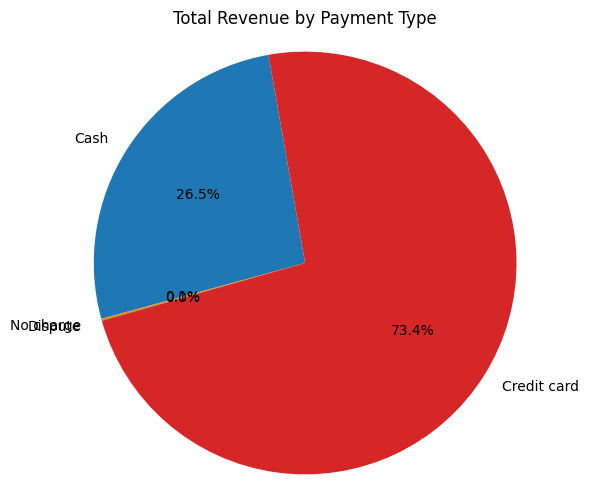

In [65]:
# Total Revenue by Payment Type (Pie Chart)
import matplotlib.pyplot as plt

df_payment = con.execute("""
    SELECT pt.payment_type_name, SUM(ft.total_amount) AS total_revenue
    FROM fact_table ft
    JOIN payment_type pt ON ft.payment_type_id = pt.payment_type_id
    GROUP BY pt.payment_type_name
""").fetchdf()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(df_payment['total_revenue'], labels=df_payment['payment_type_name'], autopct='%1.1f%%', startangle=100)
plt.title("Total Revenue by Payment Type")
plt.axis('equal')
plt.show()


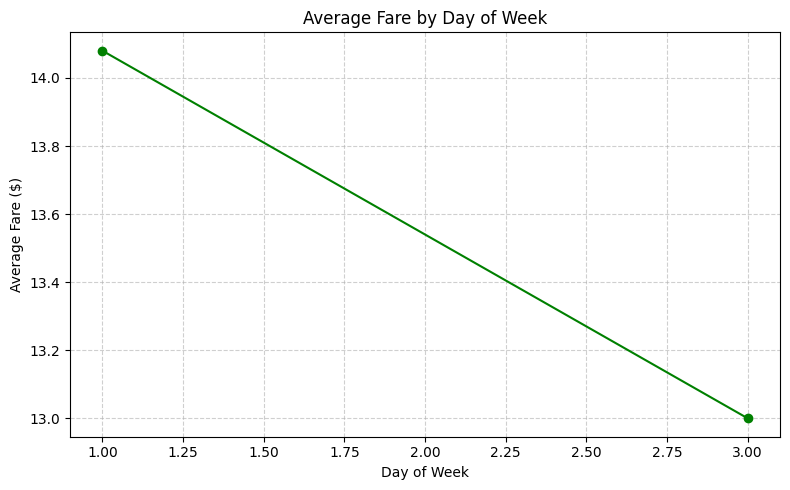

In [67]:
# Average Fare by Day of Week (Line Plot)
df_day_fare = con.execute("""
    SELECT d.pickup_weekday, ROUND(AVG(ft.fare_amount), 2) AS avg_fare
    FROM fact_table ft
    JOIN datetime d ON ft.datetime_id = d.datetime_id
    GROUP BY d.pickup_weekday
    ORDER BY d.pickup_weekday
""").fetchdf()

# Plot
plt.figure(figsize=(8, 5))
plt.plot(df_day_fare['pickup_weekday'], df_day_fare['avg_fare'], marker='o', color='green')
plt.title("Average Fare by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Fare ($)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### ETL Process Using Uber Dataset
We performed a complete **ETL** exercise on a real Uber dataset, following a structured data engineering workflow:

1. **Extract** – Loaded the raw data from a CSV file (source system).

2. **Transform** – Cleaned the data, created relevant columns, and built proper data models (fact and dimension tables).

3. **Load** – Stored the transformed data into a *DuckDB* database, acting as our central *data warehouse*.

After that, we executed *SQL queries directly on the DuckDB tables* using Python APIs for analytical processing.

Finally, we performed *data aggregations and visualizations — demonstrating the post-ETL analysis phase*.

